<a href="https://colab.research.google.com/github/hazelkimm/Sentiment-Analysis/blob/main/Hazel_Lab_2_Data_Visualization_in_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization**

Data visualization refers to representing data using graphics such as charts and maps. It is a really important part of data analysis as it allows you to identify patterns in your data and draw conclusions. It also makes it easier to communicate your data.

For this project, we will learn 2 popular Python libraries for data visualization: Matplotlib and Seaborn.


# **Matplotlib**

<img src='https://machinelearningapplied.com/wp-content/uploads/2019/10/matplotlib_logo.png'>

Matplotlib is a library in Python used for data visualization. It allows you to create different types of plots and also gives you various options for customizing your graphics. You can use it to create both static and interactive visualizations (though in this lab we will be focusing on creating static visualizations). If you have any questions or run into any issues, you can refer to the extensive documentation on the Matplotlib website.

Note that there are various sub-libraries within the Matplotlib library. The one we will be using is called Pyplot. Hence, when we are importing Matplotlib, we have to specify which sub-library we want to import:



In [ ]:
#Importing Pyplot from Matplotlib
import matplotlib.pyplot as plt

We also have to make sure to import other necessary libraries before we start coding:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

**Question 1:** Can you think of another way of importing Pyplot? (Hint: It saves you the need to name the library.)

In [ ]:
import matplotlib.pyplot as plt

## **Creating Visualizations**

There are so many plots and types of visualizations you can create in Matplotlib but today, we'll focus on 6 visualizations:

- Bar chart
- Pie chart
- Line chart
- Histogram
- Scatter plot
- Boxplot


### **Bar Chart**

A bar chart is used for visualizing the distribution of a categorical variable. It can either be vertical or horizontal. In a vertical bar chart, the categories (e.g. freshman, sophomore, junior, senior) is on the x-axis and the measure of frequency (e.g. number, frequency density, percentage) is on the y-axis. This is reversed in a horizontal bar chart. The type of bar chart you should use is a matter of convenience.

This is how you can create a bar chart using Matplotlib. Seaborn is a library in Python used for data visualization but it also has various built-in datasets (see the list of all built-in datasets [here](https://github.com/mwaskom/seaborn-data)). We start by importing one of these built-in datasets, a dataset named `tips`.

In [ ]:
#Importing a built-in dataset
tips_df = sns.load_dataset('tips')
tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


To create a bar chart, we need 2 arrays:

- An array of the unique values of the categories
- An array of the frequency measure of these categories

Say we wanted to visualize the distribution of the `day` variable. The first step is to create the two arrays we need.


In [ ]:
day_value_counts = tips_df["day"].value_counts()
day_value_counts

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
#Array of categories
day_names = day_value_counts.index
day_names

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

In [ ]:
#Array of values
day_values = day_value_counts.values
day_values

array([87, 76, 62, 19])

Now we can create the bar chart in Matplotlib:

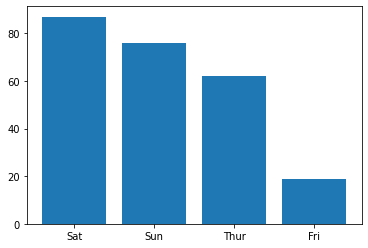

In [ ]:
#Vertical bar chart
plt.bar(x = day_names, height = day_values)
plt.show()
#This removes unnecesary text – more on this later.

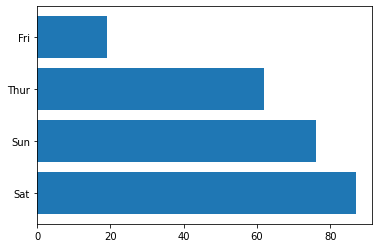

In [ ]:
#Horizontal bar chart
plt.barh(day_names, day_values)
plt.show()

You can customize your bar chart by changing its color, borders, etc. See the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) for the full list of customizations and [this link](https://matplotlib.org/stable/gallery/color/named_colors.html) for a list of all the colors you can use in Matplotlib.

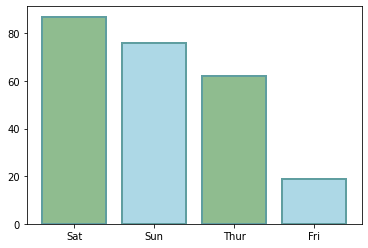

In [ ]:
plt.bar(x = day_names, height = day_values, color = ["darkseagreen", "lightblue"], edgecolor = "cadetblue", linewidth = 2)
plt.show()

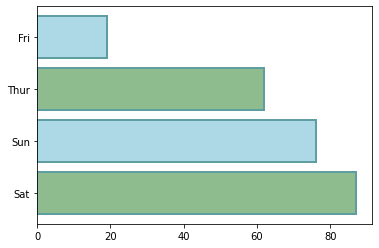

In [ ]:
plt.barh(y = day_names, width = day_values, color = ["darkseagreen", "lightblue"], edgecolor = "cadetblue", linewidth = 2)
plt.show()

**Question 2:** Pick another categorical variable from `tips_df` and create a bar chart to show its distribution.

<BarContainer object of 6 artists>

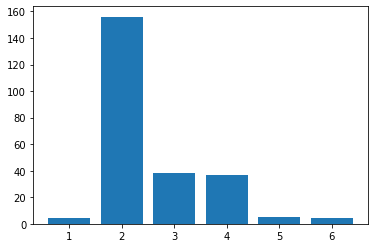

In [ ]:
size_value_counts = tips_df["size"].value_counts()
size_names = size_value_counts.index
size_values = size_value_counts.values
plt.bar(x = size_names, height = size_values)

### **Pie Chart**

A pie chart is similar to a bar chart in that it's used for visualizing the distribution of a categorical variable. It gives you a better visual sense of the relative proportions of each category. However, it's not very useful when there are a lot of categories.

To create a pie chart, you only have to specify the array of categories.

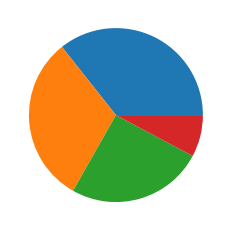

In [ ]:
plt.pie(x = day_values)
plt.show()

You can customize your pie chart by adding labels, changing colors, etc. (full list [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)):

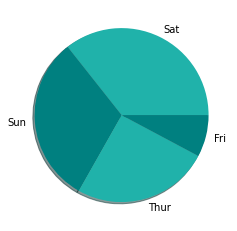

In [ ]:
plt.pie(x = day_values, labels = day_names, colors = ["lightseagreen", "teal"], shadow = True)
plt.show()

**Question 3:** Use a pie chart to visualize the categorical variable you chose in question 2.

([<matplotlib.patches.Wedge at 0x7fd13434c3d0>,
 [Text(-0.46630586953858105, 0.9962724707798907, '2'),
  Text(-0.22500720993803192, -1.0767412667284106, '3'),
  Text(0.7575324352517332, -0.797586741076843, '4'),
  Text(1.0600355488685091, -0.29381054292696657, '5'),
  Text(1.0868966891428178, -0.16927961227029392, '1'),
  Text(1.0985414996989988, -0.05662661422930992, '6')])

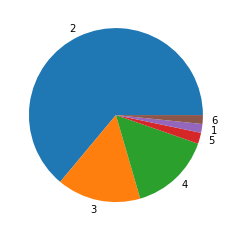

In [ ]:
plt.pie(x = size_values, labels = size_names)

### **Line Chart**

A line chart is used for visualizing trends and patterns in a numerical variable (e.g. the number of people enrolled in a class). It's best used for showing how a numerical variable changes over time.

To create a line chart, we need 2 arrays:

- An array of the values of the numerical variable
- An array of the categories (e.g. time periods)

For this example, we will be using another built-in dataset called `flights`. Say we wanted to see how the total number of flight passengers changed across the years. The first step is to create these 2 arrays.

In [ ]:
#Importing the dataset
flights_df = sns.load_dataset('flights')
flights_df.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


To get the information we want, we have to group the years based on the sum of passengers. If you've taken DATA 8, you may recognize that we can use the `group()` function to do this.

```
flights_df.group("year", sum).select("year", "passengers sum")
```

This is what we're doing below, except using built-in Python functions rather than functions from the datascience library:

In [ ]:
flights_grouped = flights_df.groupby("year").sum()
flights_grouped

,passengers
year,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700
1954,2867
1955,3408
1956,3939
1957,4421


Now we can just select these two columns to create arrays. Note that the first column is the index column.

In [ ]:
years = flights_grouped.index
years

Int64Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960],
           dtype='int64', name='year')

In [ ]:
passengers = flights_grouped["passengers"]
passengers

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

We're ready to create the line chart in Matplotlib:

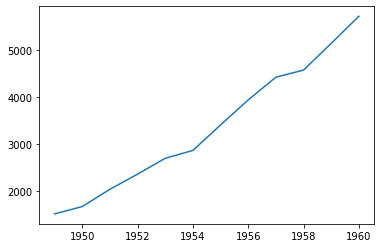

In [ ]:
plt.plot(years, passengers) 
plt.show()

You can customize your line graph in [different ways](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) of arguments):

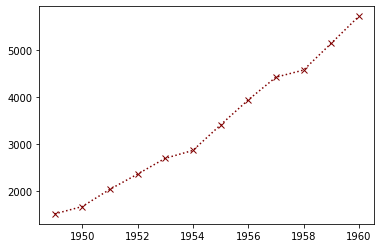

In [ ]:
plt.plot(years, passengers, color = "maroon", marker = "x", linestyle = "dotted")
plt.show()

Note that you could also use a bar chart to visualize this information but a line chart also shows you how the number of passengers changes over time.

**Question 4:** Think of another numerical variable from `flights_df` (e.g. the average number of passengers for each month) and create a line chart to visualize it.

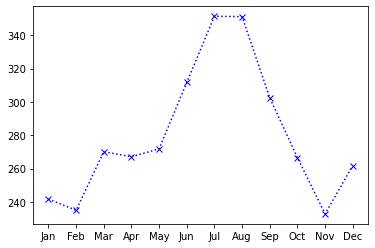

In [ ]:
flights_month = flights_df.groupby("month").mean()
avgpass = flights_month["passengers"]
month = flights_month.index

plt.plot(month, avgpass, color = "blue", marker = "x", linestyle = "dotted")
plt.show()

### **Histogram**

A histogram is used for visualizing the distribution of a numerical variable. It gives you a sense of the frequency of different values of the variable in your dataset. It is a very important visualization for statistics. The values of the numerical variable are on the x-axis and the measure of frequency (e.g. number, frequency density) is on the y-axis. You can also flip the axes, which is useful for some graphs (like a population pyramid) but it's not generally very convenient.

Here's an example of visualizing the distribution of the total bill (from `tips_df`):

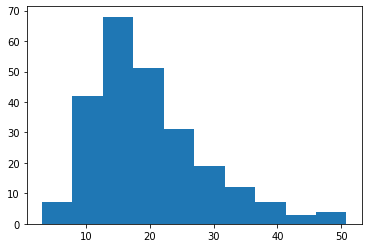

In [ ]:
plt.hist(x = tips_df["total_bill"])
plt.show()

This histogram is right-skewed which basically means that smaller values of the numerical variable occur at a higher frequency than larger values. More technically, the median of the variable is lower than its mean, as extreme values are inflating the mean. This makes sense: it's rare for people to place really large orders at restaurants. It's useful to interpret the skew of the histogram as it gives you greater insight into your data.

The default histogram is a frequency histogram which shows the number for each interval. You can create a density histogram by saying `density = True`. Also, it's generally a good idea to specify the bins.

[Here's](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) a full list of arguments for the plt.hist() function.

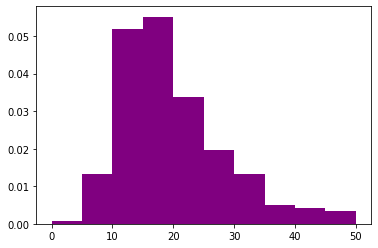

In [ ]:
plt.hist(x = tips_df["total_bill"], bins = np.arange(0, 55, 5), density = True, color = "purple")
plt.show() 

**Question 5:** 

- Pick another numerical variable from `tips_df` and create a density histogram to visualize it (don't forget to specify the bins!).
- How is your histogram skewed? Why do you think this is? Does it make sense?

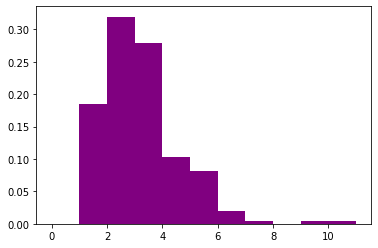

In [ ]:
plt.hist(x = tips_df["tip"], bins = np.arange(0, 12, 1), density = True, color = "purple")
plt.show()
#This histogram is skewed to the right. It makes sense, as we pay tips proportional to the total amount of bill. As total bill is right skewed, the histogram of tip is skewed to the right as well.

### **Boxplot**

A boxplot is similar to a histogram in that it allows you to visualize the distribution of a numerical variable. One difference between the two is that a boxplot gives you more specific statistics about the numerical varable (such as its maximum value, median, mean, etc.) whereas a histogram gives you a better visual sense of the spread of the variable.

This graphic shows how to interpret a boxplot:

<img src='https://matplotlib.org/stable/_images/boxplot_explanation.png'>

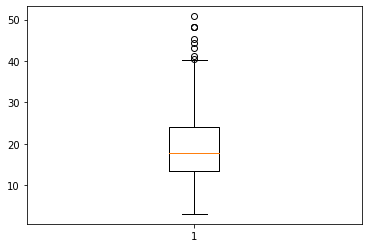

In [ ]:
plt.boxplot(x = tips_df["total_bill"])
plt.show()

It may be more useful to create a horizontal boxplot:

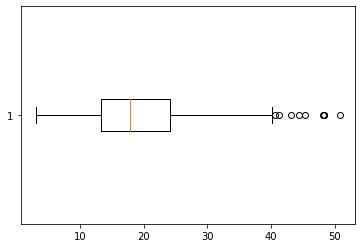

In [ ]:
plt.boxplot(x = tips_df["total_bill"], vert = False)
plt.show()

The boxplot aligns with the previous histogram for total bill. It shows a right skew as the median is closer to the lower quartiler and there's a longer tail to the right.

By default, the boxplot doesn't show the mean of your variable. You can choose to display the mean:

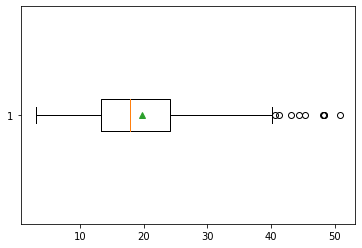

In [ ]:
plt.boxplot(x = tips_df["total_bill"], vert = False, showmeans = True)
plt.show()

Displaying the mean makes it easier for you to interpret the skew of the variable. In this example, since the mean is higher than the median, it means that the variable is right skewed. If the mean is lower than the median, it means that the variable is left skewed. If they're equal, it means the variable doesn't have a skew (the histogram will be symmetric).

Check out [this website](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) for a full list of arguments you can specify for the boxplot function.

**Question 6:**

- Create a boxplot for the variable you chose in question 5 (display the mean).
- How is the variable skewed? How can you tell by looking at the boxplot?

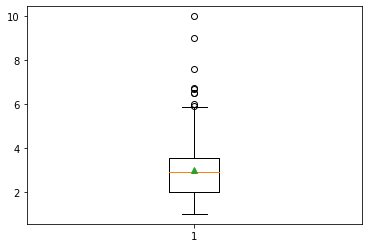

In [ ]:
plt.boxplot(x = tips_df["tip"], showmeans = True)
plt.show()

#Since mean is higher than median, the variable tip is right skewed.

### **Scatter Plot**

Scatter plots are used for visualizing the relationship between two numerical variables, another really important plot for statistics. More technically, scatter plots visualize the correlation between two numerical variables which gives you a sense of how one variable changes with respect to the other.

Say we wanted to see how tips paid change with respect to the total bill. 

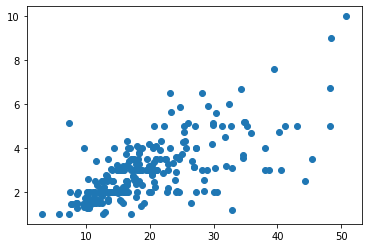

In [ ]:
plt.scatter(x = tips_df["total_bill"], y = tips_df["tip"])
plt.show()

This scatter plot shows a somewhat strong positive correlation between the total bill and tips paid. This makes sense as people generally tip as a percentage of the total bill (mainly for smaller values of the bill).

You can change the defaults of the scatter plot (full list of arguments [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)):

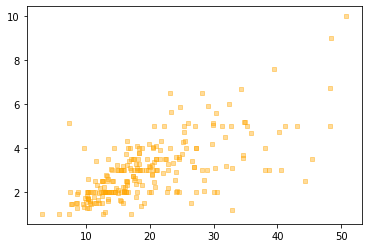

In [ ]:
plt.scatter(x = tips_df["total_bill"], y = tips_df["tip"], s = 10, c = "orange", marker = "s", alpha = 0.4)
plt.show() 

**Question 7:**

- Pick 2 other numerical variables whose relationship you're interested in. Create a scatter plot to visualize them.
- What does the scatter plot tell you about the relationship between the variables? Does it make sense?

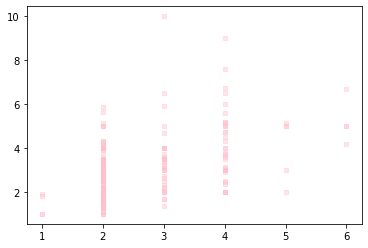

In [ ]:
plt.scatter(x = tips_df["size"], y = tips_df["tip"], s = 10, c = "pink", marker = "s", alpha = 0.4)
plt.show() 

## **More Features**

Matplotlib allows you to add more features to your graphs such as axis labels and titles. Here, we'll be talking about 6 functions but you can check out [this link](https://matplotlib.org/stable/api/pyplot_summary.html) for the full list of Pyplot functions:

- `plt.xlabel(“name”)`: Adds a label to the x-axis
- `plt.ylabel(“name”)`: Adds a label to the y-axis
- `plt.title(“name”)`: Adds a title to your graph
- `plt.grid(True)`: Adds a grid to your graph (Must be before the follow 2 functions)
- `plt.figure(figsize = (8, 10))`: Specifies the length and width of your graph
- `plt.show()`: Removes unnecessary text and only shows you the graph

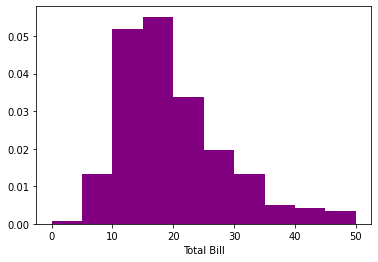

In [ ]:
plt.hist(x = tips_df["total_bill"], bins = np.arange(0, 55, 5), density = True, color = "purple")
#X-axis label
plt.xlabel("Total Bill")
plt.show()

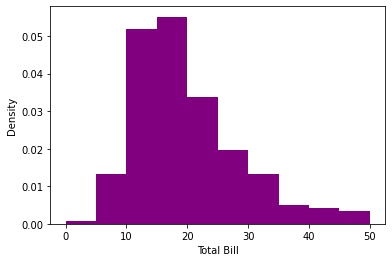

In [ ]:
plt.hist(x = tips_df["total_bill"], bins = np.arange(0, 55, 5), density = True, color = "purple")
plt.xlabel("Total Bill")
#Y-axis label
plt.ylabel("Density")
plt.show()

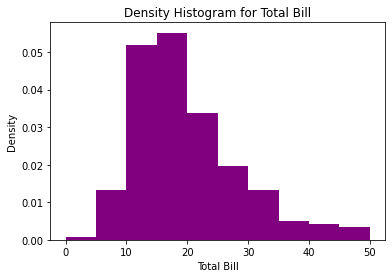

In [ ]:
plt.hist(x = tips_df["total_bill"], bins = np.arange(0, 55, 5), density = True, color = "purple")
plt.xlabel("Total Bill")
plt.ylabel("Density")
#Title
plt.title("Density Histogram for Total Bill")
plt.show()

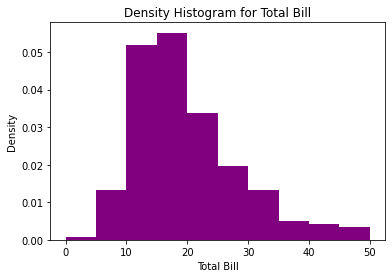

<Figure size 576x792 with 0 Axes>

In [ ]:
plt.hist(x = tips_df["total_bill"], bins = np.arange(0, 55, 5), density = True, color = "purple")
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Density Histogram for Total Bill")
#Changing the dimensions of the graph - first one is height and second one is width
plt.figure(figsize = (8, 11))
plt.show()

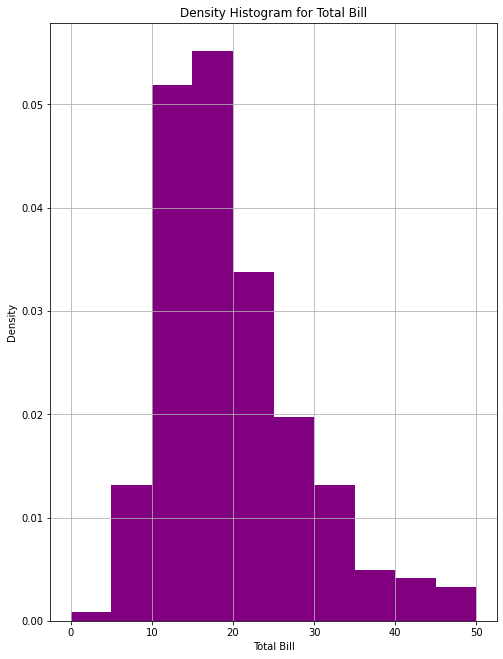

In [ ]:
plt.figure(figsize = (8, 11))
plt.hist(x = tips_df["total_bill"], bins = np.arange(0, 55, 5), density = True, color = "purple")
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Density Histogram for Total Bill")
#Adding a grid
plt.grid(True)
plt.show()

Note that you must call the plt.grid() function before you call the plt.figure() function (try calling it after and see what happens).

We have used the plt.show() function every graph to remove unnecessary text and avoid cluttering the graph. This is what happens when you don't use plt.show():

(array([0.00082305, 0.01316872, 0.05185185, 0.05514403, 0.03374486,
        0.01975309, 0.01316872, 0.00493827, 0.00411523, 0.00329218]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
 <a list of 10 Patch objects>)

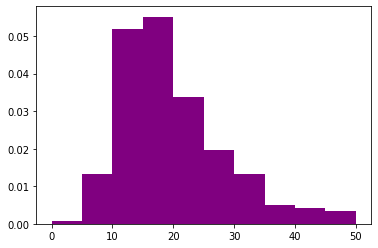

In [ ]:
plt.hist(x = tips_df["total_bill"], bins = np.arange(0, 55, 5), density = True, color = "purple")

Python is giving you arrays of the intervals and their corresponding frequency densities. This may be useful to show in some situations but if you want to focus on the graph, you can remove it by calling plt.show(). It must always be called after all the other functions.

We've only scracthed the surface of data visualization using Matplotlib so I encourage you to check out the links to additional resources to learn more!

# **Resources**

1. [Official Matplotlib Documentation](https://matplotlib.org/)
2. [Sample Graphs in Matplotlib](https://matplotlib.org/stable/gallery/index.html)

# **Project Tasks**

1. We can use data visualization to further explore the project datasets. Create the following visualizations and write up a brief analysis on each (2-3 sentences). Talk about what the visualization shows (any trends/patterns) and anything else you find interesting.

  - From the COVID-19 All Vaccines Tweets dataset:

    - Boxplot of user followers

    - Bar chart of date (may have to do some additional research for this)

    - Scatter plot of retweets and favorites

  - From the COVID-19 World Vaccination Progress dataset:

    - Bar chart of the top 10 countries with the highest average daily vaccinations (total daily vaccinations, not per million)

    - Pick 2 countries and filter the dataset so that it only has data on these 2 countries. Create a histogram for the people_vaccinated column for each country and compare them. Bonus points if you create overlapping histograms (you have to do additional research for this)!

    - Line chart to show how daily vaccinations per million changed over time for a country of your choice

2. Come up with 3 more ideas for visualizations and create them. Like for the previous question, include a brief 2-3 sentence analysis. You can come up with any idea you like – you can even combine the 2 datasets.

# Written by Vaidehi Bulusu (Edited by Akira)

---

In [ ]:
tweets_df = pd.read_csv("vaccination_all_tweets.csv")
tweets_df.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


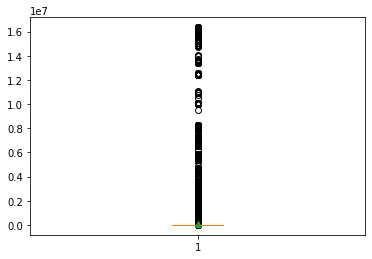

In [ ]:
plt.boxplot(x = tweets_df["user_followers"], showmeans = True)
plt.show()

#As it has too many data, boxplot doesn't seem effective.

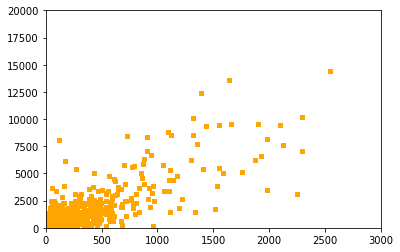

In [ ]:
plt.scatter(x = tweets_df["retweets"], y = tweets_df["favorites"], s = 20, c = "orange", marker = "s", alpha = 1)
plt.ylim(0, 20000)
plt.xlim(0,3000)
plt.show() 

#It's quite interesting the graph is densed at the left. I expected likes would increase as retweets increase, since it means that user is active on twitter.
#But the graph doesn't show a strong linear relationship. 

In [ ]:
vac_df = pd.read_csv("country_vaccinations.csv")
vac_df.head(5)

#Line chart to show how daily vaccinations per million changed over time for a country of your choice

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


country
China            6.930368e+06
India            4.175994e+06
United States    1.191727e+06
Brazil           9.435287e+05
Indonesia        8.462893e+05
Japan            6.215795e+05
Bangladesh       5.453055e+05
Pakistan         5.430051e+05
Vietnam          5.310949e+05
Mexico           4.134253e+05
Germany          3.761575e+05
Name: daily_vaccinations, dtype: float64


<BarContainer object of 11 artists>

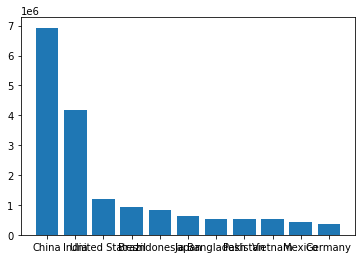

In [ ]:
country = vac_df.groupby("country").mean()
avgvac = country["daily_vaccinations"]
avgten = avgvac.sort_values(ascending = False)[0:11]
avgten_value = avgten.index

print(avgten)
plt.bar(height = avgten, x = avgten_value)

# It seems reasonable, as the average number of daily vaccination highly relies on the population of the country.
# It therefore shows high populated country has high number of daily vaccinations.

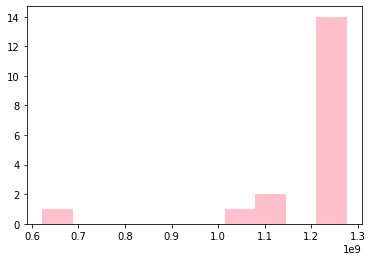

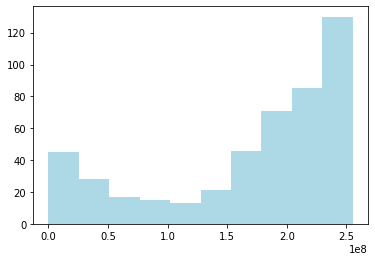

In [ ]:
#Create a histogram for the people_vaccinated column for each country and compare them.
newvac = vac_df.loc[vac_df["country"].isin(["China", "United States"])]
chinanewvac = newvac[newvac["country"] == "China"]
plt.hist(x = chinanewvac["people_vaccinated"].dropna(), color = "pink")
plt.show()

usnewvac = newvac[newvac["country"] == "United States"]
plt.hist(x = usnewvac["people_vaccinated"].dropna(), color = "lightblue")
plt.show()

#It's interesting that although China has #1 daily vaccination and the US is ranked on 3rd, their x and y axis show quite a large difference.

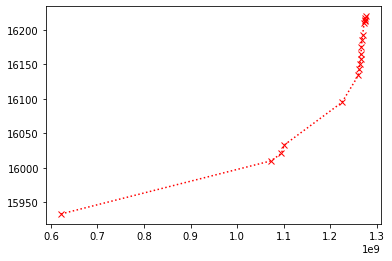

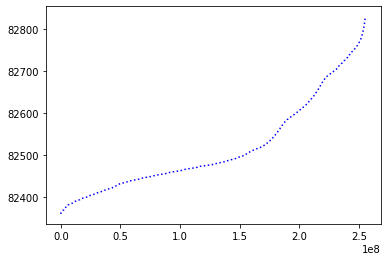

In [ ]:
#Line chart to show how daily vaccinations per million changed over time for a country of your choice
plt.plot(chinanewvac["people_vaccinated"].dropna(), chinanewvac["people_vaccinated"].dropna().index, color = "red", marker = "x", linestyle = "dotted")
plt.show()

plt.plot(usnewvac["people_vaccinated"].dropna(), usnewvac["people_vaccinated"].dropna().index, color = "blue", linestyle = "dotted")
plt.show()

#The graph itself has similar shape, rising sharply from the point of 2/3. But again, as they have different x and y axis, we can't simply compare only with the shape of the graph.

In [ ]:
vac_df_manu = pd.read_csv("country_vaccinations_by_manufacturer.csv")
vac_df_manu.head(5)

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


country
Falkland Islands                   21185.393939
Saint Helena                       13915.164835
Tokelau                            12718.106195
Pitcairn                           10891.797619
Niue                               10109.509434
Cuba                                9955.943333
Gibraltar                           8000.463470
Bonaire Sint Eustatius and Saba     7412.000000
Bhutan                              7241.676880
Brunei                              6906.782857
Turkmenistan                        6618.888889
Name: daily_vaccinations_per_million, dtype: float64


<BarContainer object of 11 artists>

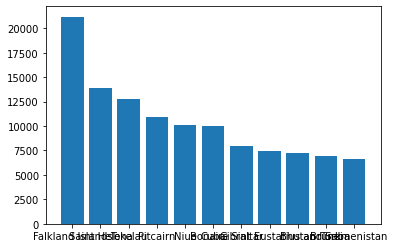

In [ ]:
#1. see top 10 countries having high daily vaccination per million. It therefore prevents the rank follow the world population rank. 
# But.... it doesn't seem useful to analyze.
country = vac_df.groupby("country").mean()
avgvac_million = country["daily_vaccinations_per_million"]
topten = avgvac_million.sort_values(ascending = False)[0:11]
topten_value = topten.index

print(topten)
plt.bar(height = topten, x = topten_value)

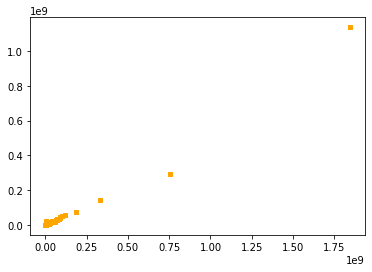

In [ ]:
#2. Then, see the relationship between tatal vaccinations and people fully vaccinated by countries.
plt.scatter(x = country["total_vaccinations"].dropna(), y = country["people_fully_vaccinated"].dropna(), s = 20, c = "orange", marker = "s", alpha = 1)
plt.show() 
# I expected it to show a clear linear regression... hmm...

date
2022-03-09    9.922995e+09
2022-03-10    9.797025e+09
2022-02-13    9.762979e+09
2022-02-28    9.761023e+09
2022-03-08    9.743663e+09
2022-02-21    9.736738e+09
2022-03-23    9.698694e+09
2022-03-22    9.681895e+09
2022-03-07    9.649427e+09
2022-03-21    9.562207e+09
2022-02-09    9.561952e+09
Name: total_vaccinations, dtype: float64


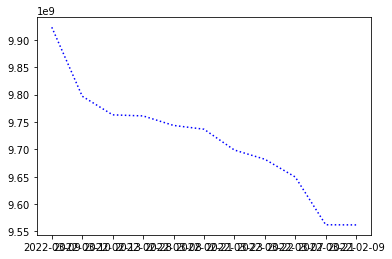

In [ ]:
#3. how does total vaccination changed based on the date
datevac = vac_df.groupby("date").sum()
totalvac_date = datevac["total_vaccinations"]
sort_total = totalvac_date.sort_values(ascending = False)[0:11]
value_total = sort_total.index
print(sort_total)
plt.plot(value_total, sort_total, color = "blue", linestyle = "dotted")
plt.show()

#By seeing top 10 values, we can find out that most of the vaccinations are adopted from February to March.